# IBD metrics vs Nh

* My Drive/GitHub/transmission_ms/ibd_vs_nh.ipynb
* Started 7 Nov 2022
* From 210823_haplotype_homozygosity.ipynb

We calculate and plot the variation of homozygosity for a 27kb locus for different sets of transmission parameters

In [1]:
import coalestr as cs
import matplotlib.pyplot as plt

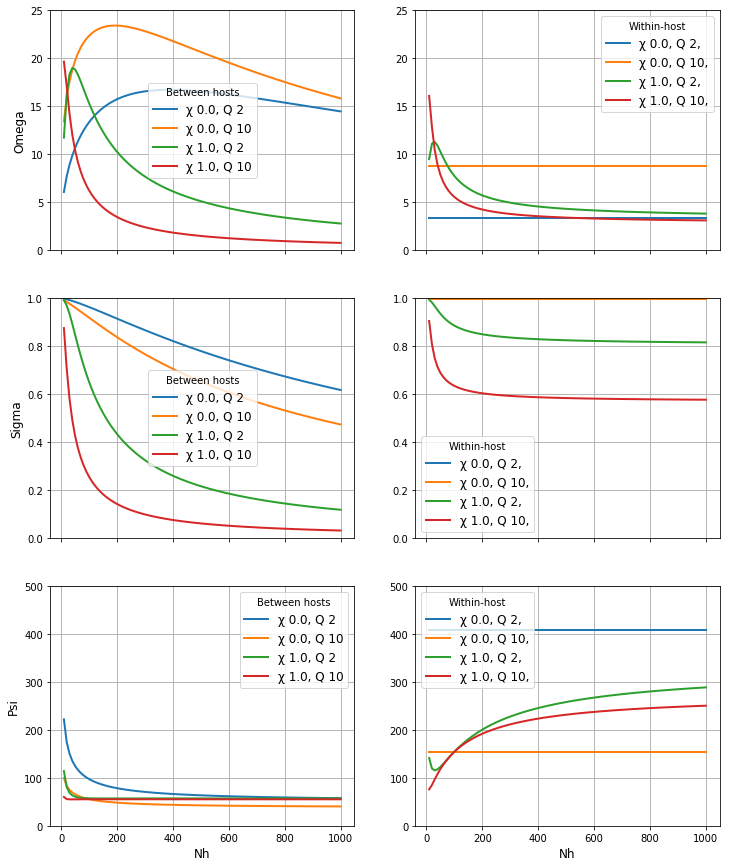

In [10]:
N_list = range(10, 1001, 10)
Q_list = [2, 10]
X_list = [0, 1]

duration = 50000 # duration of simulation in generations

fig, ((a1, a2), (a3, a4), (a5, a6)) = plt.subplots(
    nrows = 3,
    ncols = 2,
    sharex = True,
    figsize=(12,15))

for X in X_list:
    for Q in Q_list:
        
        beho_omega = []
        beho_sigma = []
        beho_psi = []
        wiho_omega = []
        wiho_sigma = []
        wiho_psi = []
        
        for N in N_list:
            history = [[duration, N, Q, X, 0]]  # t_his, Nh, Q, chi, migration
            my_pop = cs.Population(history)
            my_pop.get_coalescent(observe = "auto", show = False)
            my_pop.get_segments(show = False)

            beho_omega.append(my_pop.shared_segments[0,1]) 
            beho_sigma.append(my_pop.shared_segments[0,2]) 
            beho_psi.append(my_pop.shared_segments[0,3]) 
            wiho_omega.append(my_pop.shared_segments[0,4]) 
            wiho_sigma.append(my_pop.shared_segments[0,5]) 
            wiho_psi.append(my_pop.shared_segments[0,6]) 
            
        a1.plot(N_list, beho_omega, linewidth=2, label = '\u03C7 {0:.1f}, Q {1:.0f}'.format(X, Q))
        a2.plot(N_list, wiho_omega, linewidth=2, label = '\u03C7 {0:.1f}, Q {1:.0f},'.format(X, Q))
        
        a3.plot(N_list, beho_sigma, linewidth=2, label = '\u03C7 {0:.1f}, Q {1:.0f}'.format(X, Q))
        a4.plot(N_list, wiho_sigma, linewidth=2, label = '\u03C7 {0:.1f}, Q {1:.0f},'.format(X, Q))
        
        a5.plot(N_list, beho_psi, linewidth=2, label = '\u03C7 {0:.1f}, Q {1:.0f}'.format(X, Q))
        a6.plot(N_list, wiho_psi, linewidth=2, label = '\u03C7 {0:.1f}, Q {1:.0f},'.format(X, Q))
        
a1.set_ylabel("Omega", fontsize=12)
a1.set_ylim(0, 25)
a1.legend(title = 'Between hosts', frameon=True, fontsize=12)
a1.grid(b=True, which='both', color='0.65', linestyle='-')

a2.legend(title = 'Within-host', frameon=True, fontsize=12)
a2.set_ylim(0, 25)
a2.grid(b=True, which='both', color='0.65', linestyle='-')

a3.set_ylabel("Sigma", fontsize=12)
a3.set_ylim(0, 1)
a3.legend(title = 'Between hosts', frameon=True, fontsize=12)
a3.grid(b=True, which='both', color='0.65', linestyle='-')

a4.set_ylim(0, 1)
a4.legend(title = 'Within-host', frameon=True, fontsize=12)
a4.grid(b=True, which='both', color='0.65', linestyle='-')

a5.set_ylabel("Psi", fontsize=12)
a5.set_xlabel("Nh", fontsize=12)
a5.set_ylim(0, 500)
a5.legend(title = 'Between hosts', frameon=True, fontsize=12)
a5.grid(b=True, which='both', color='0.65', linestyle='-')

a6.set_xlabel("Nh", fontsize=12)
a6.set_ylim(0, 500)
a6.legend(title = 'Within-host', frameon=True, fontsize=12)
a6.grid(b=True, which='both', color='0.65', linestyle='-')

plt.show()